### Linear Regression:

Simple Linear Regression, Multiple Linear Regression, Polynomial Linear Regression

- help us understand the linear relationship between variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

- Y: Response Variable X: Predictor Variable Y

Linear function:

- Yhat = a + bX

a refers to the intercept of the regression line, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [3]:
# Import Libraries,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [7]:
# Load data,
data = pd.read_csv('Final.csv')
data

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.470000,2.680000,9.00,111,5000.000000,21,8.703704,13495.0,11.190476,Low,1,0
1,1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.470000,2.680000,9.00,111,5000.000000,21,8.703704,16500.0,11.190476,Low,1,0
2,2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.680000,3.470000,9.00,154,5000.000000,19,9.038462,16500.0,12.368421,Medium,1,0
3,3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.190000,3.400000,10.00,102,5500.000000,24,7.833333,13950.0,9.791667,Low,1,0
4,4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.190000,3.400000,8.00,115,5500.000000,18,10.681818,17450.0,13.055556,Low,1,0
5,5,2,122,audi,gas,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.190000,3.400000,8.50,110,5500.000000,19,9.400000,15250.0,12.368421,Low,1,0
6,6,1,158,audi,gas,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.190000,3.400000,8.50,110,5500.000000,19,9.400000,17710.0,12.368421,Low,1,0
7,7,1,122,audi,gas,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.190000,3.400000,8.50,110,5500.000000,19,9.400000,18920.0,12.368421,Low,1,0
8,8,1,158,audi,gas,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.130000,3.400000,8.30,140,5500.000000,17,11.750000,23875.0,13.823529,Medium,0,1
9,9,2,192,bmw,gas,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,3.500000,2.800000,8.80,101,5800.000000,23,8.103448,16430.0,10.217391,Low,1,0


In [10]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

#### Simple Linear Regression,

Lets create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable to see whether highway-mpg would help us to predict the car price

In [11]:
X = data[['highway-mpg']]
Y = data['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [12]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

Get the value of intercept (a) and Slope (b)

In [13]:
print(lm.intercept_)
print(lm.coef_)

-14617.843054664594
[3458.68511314]


Plugging in the actual values we get:

- price = 38423.31 - 821.73 x highway-mpg


Now  with "engine-size" as the predictor variable and the "price" as the response variable to see whether engine-size would help us to predict the car price

In [14]:
lm1 = LinearRegression()
X = data[['engine-size']]
Y = data['price']
lm1.fit(X,Y)

LinearRegression()

In [15]:
Yhat=lm1.predict(X)
Yhat[0:5]  

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [16]:
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281049
[166.86001569]


Plugging in the values ,we get

- price = -7963.338906281049 + 166.86001569 x engine-size

#### Multiple Linear Regression,

In [17]:
M = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
lm.fit(M, data['price'])

LinearRegression()

In [18]:
print(lm.intercept_)
print(lm.coef_)

-14385.634549360097
[ 36.6377371    3.50038215  85.37370862 500.51979785]


Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

## Regression Plot:


When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize Horsepower as potential predictor variable of price:

(0.0, 47542.095130856964)

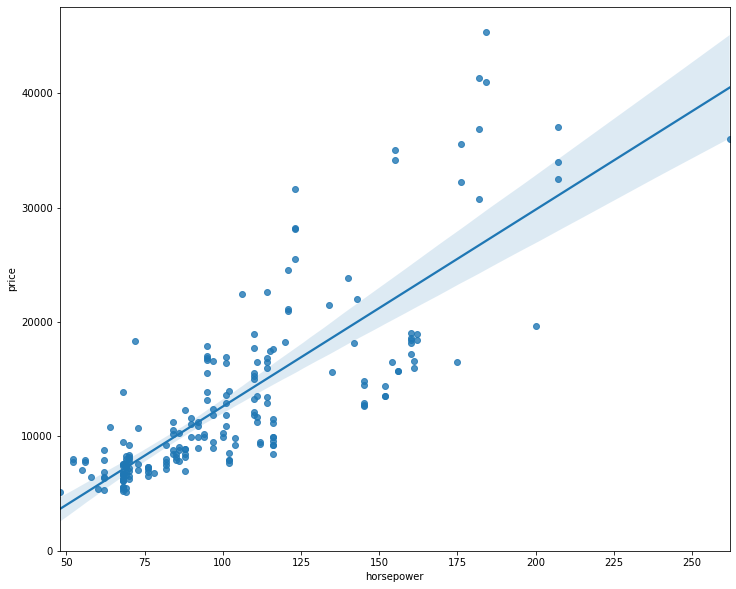

In [21]:
import seaborn as sns
width=12
height=10
plt.figure(figsize = (width,height))
sns.regplot(x='horsepower',y='price',data=data)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

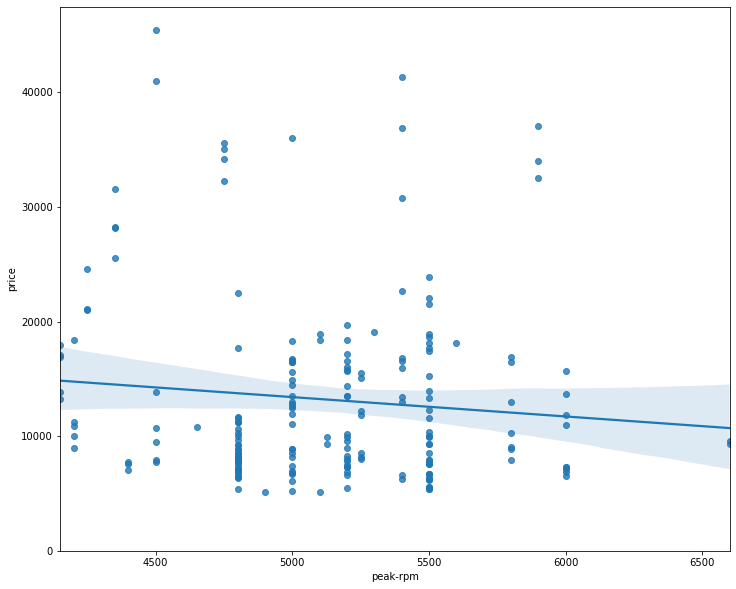

In [22]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=data)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" 
- we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [23]:
 data[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,0.017694,-0.101616
highway-mpg,0.017694,1.000000,0.801118
price,-0.101616,0.801118,1.000000


The variable "peak-rpm" has a stronger correlation with "price", -0.704692 compared to "highway-mpg" which is -0.101616.

### Residual Plot:

A good way to visualize the variance of the data is to use a residual plot.

Residual : The difference between the observed value (y) and the predicted value. It is the distance from the data point to the fitted regression line. (Yhat) is called the residual

Residual plot : It is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We should always look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data ( Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data )

(0.0, 33129.93533408737)

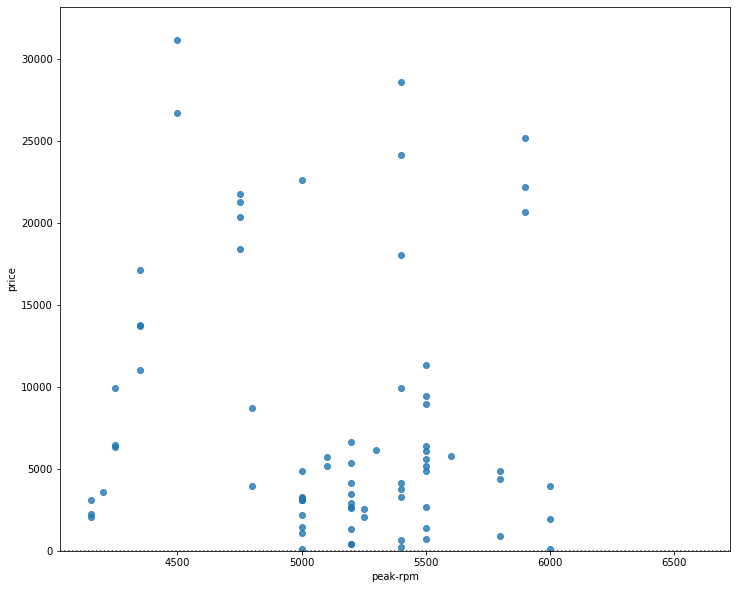

In [24]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(x="peak-rpm", y="price", data=data)
plt.ylim(0,)

- residuals are not randomly spread around the x-axis, thus a Non-Linear Model is most suitable for this data.

#### Multiple Linear Regression,

Visualizing a model for Multiple Linear Regression

Distribution plot : Compare the distribution of the fitted values that result from the model and distribution of the actual values.



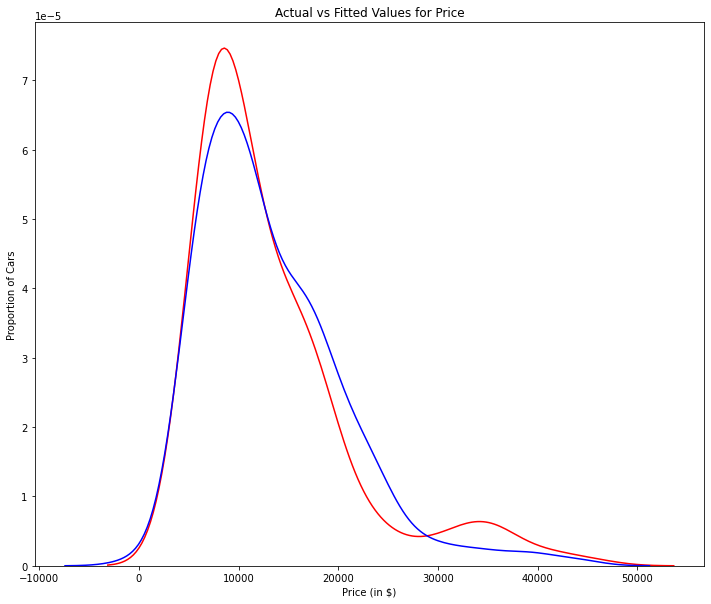

In [26]:
import warnings
warnings.filterwarnings('ignore')
Yhat = lm.predict(M)
plt.figure(figsize=(width,height))
ax1=sns.distplot(data['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in $)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### Polynomial Regression,

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

A linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [43]:
# plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Price and Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [44]:
x = data['highway-mpg']
y = data['price']
#Let's fit the polynomial using the function polyfit,then use the function to display the polynomial function.
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


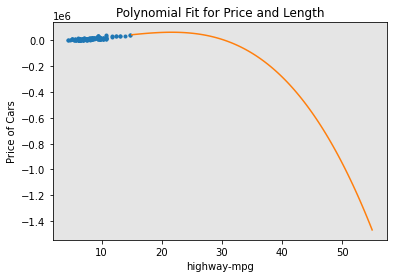

In [45]:
PlotPolly(p, x, y, 'highway-mpg')

In [39]:
np.polyfit(x, y, 3)

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

From this plot,
- polynomial model performs better than the linear model. 
- This is because the generated polynomial function "hits" more of the data points.

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


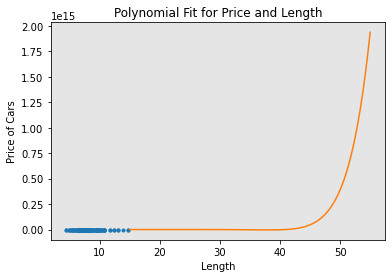

In [48]:
#Create 11 order polynomial model with the variables x and y from above
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

In [49]:
from sklearn.preprocessing import PolynomialFeatures

#create a PolynomialFeatures object of degree 2 
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [50]:
M_pr=pr.fit_transform(M)

In [51]:
M.shape

(201, 4)

In [52]:
M_pr.shape

(201, 15)

### Pipeline:

- Data Pipelines simplify the steps of processing the data.

In [53]:
#create a pipeline and also use StandardScaler as a step in our pipeline,
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
#creating a list of tuples including the name of the model/estimator & its corresponding constructor,
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [55]:
#Input the list as an argument to the pipeline constructor, 
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
#Normalize the data and perform a transform and fit on the model simultaneously,
pipe.fit(M,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [58]:
#Normalize the data, perform a transform and produce a prediction simultaneously,
ypipe=pipe.predict(M)
ypipe[0:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

Lets create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features M and targets y

In [59]:
Input = [('scale',StandardScaler()),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(M,y)
ypipe = pipe.predict(M)
ypipe[0:10]

array([14055.08612634, 14055.08612634, 18638.8884263 , 10758.2803759 ,
       16670.07025864, 14735.68505426, 15915.31383891, 16300.35587545,
       18610.89141407, 10974.48897133])

### In-Sample Evaluation:

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R-squared : R-squared : R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

- Mean Squared Error (MSE): The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).


#### Model 1: Simple Linear Regression,

Calculate the R^2?

In [60]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.7609686443622008

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE?

In [61]:
#predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [62]:
#import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error
#compare the predicted results with the actual results
mse = mean_squared_error(data['price'], Yhat)
mse

15021126.02517414

##### Model 2: Multiple Linear Regression,

Calculate the R^2?

In [63]:
from sklearn.metrics import r2_score

In [64]:
r_squared = r2_score(y, p(x))
r_squared

0.6753581660812172

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit.

Calculate the MSE?

In [66]:
mean_squared_error(data['price'], p(x))

20401030.180019394

## Prediction:

In [67]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [68]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [69]:
lm.fit(X, Y)
lm

LinearRegression()

In [70]:
yhat=lm.predict(new_input)
yhat[0:5]

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

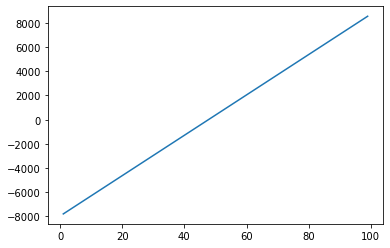

In [71]:
plt.plot(new_input, yhat)
plt.show()

##### Decision Making: Good Model Fit,

- Model with the higher R-squared value is a better fit for the data.

- Model with the smallest MSE value is a better fit for the data.</p>

Simple Linear Regression : 
- Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7

Multiple Linear Regression : 
- Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7

Polynomial Fit : 
- Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7


##### Conclusion:
Comparing these three models, we conclude that the Multiple Linear Regression model is the best model to be able to predict price from our dataset. Well, this result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.